<a href="https://colab.research.google.com/github/SumaOladri/potential-waddle/blob/master/Module_2_1_2_Regular_Expressions_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regular Expression**


*   Introduction
*   Sequence Characters
*   Quantifiers
*   How to use regular expression
*   Operations performed using regular expression
*   Special Characters
*   Using Regular Expression on File
*   Retrieving information from HTML file

# **Introduction**

We need to extract rquired information from given data.

Searching the required data can be effectively carried out using REGULAR EXPRESSION.

**Definition:**
> Regular expression is a string that contains special symbol and characters to find and extract the information needed by user from given data

Regular Expression helps to **search** information, **match, find and split** information as per requirement

It is simply called as ***regex***

It is available in many languages like Java, Perl, AWK, Python

Python provides **module re** for regular expression. It needs to be imported for using methods to perform operations


## **How to write Regular Expression?**

Regular Expression is a string containing characters and special symbols

It can be represented

>**1.  As a raw string**: Use 'r' before normal string

>**2.  Using backslashes**: Use backslash before any escape sequence

Whenever a normal string is written including escape sequences then it has formatting information.

```
st = "This is normal \nString"
print(st)
```

The above code interpretes \n as new line character and gives output as

```
This is normal
String
```

Therefore in order to represent regular expression using symbols '\' we need to treat the strings as a raw string.

Otherwise formatting information can be skipped using double backslashes.

**Example:**
```
reg = r'm\w\w'             # Treat the string as a raw string
reg1 = 'm\\w\\w'           # Normal string using double back slashes



## **How to interpret Regular Expression**

Let us take an example to understand the meaning of regular expression

```
reg = r'm\w\w'
```
The preceding 'r' represents that it is a raw string.

> The first character in the string is 'm'. It tells that **first character must be 'm' only**.

> The second character '\w' represents any one character **in A to Z, a to z and 0 to 9.**

> The third character is also '\w'. So it is expected to be **alphanumeric**

Hence, above Regular Expression is representing string with length three and it is starting with character 'm'. Next two charcters could be alphanumeric.

**Note:** '\w' is called as sequence characters


# **Sequence Characters in Regular Expression**

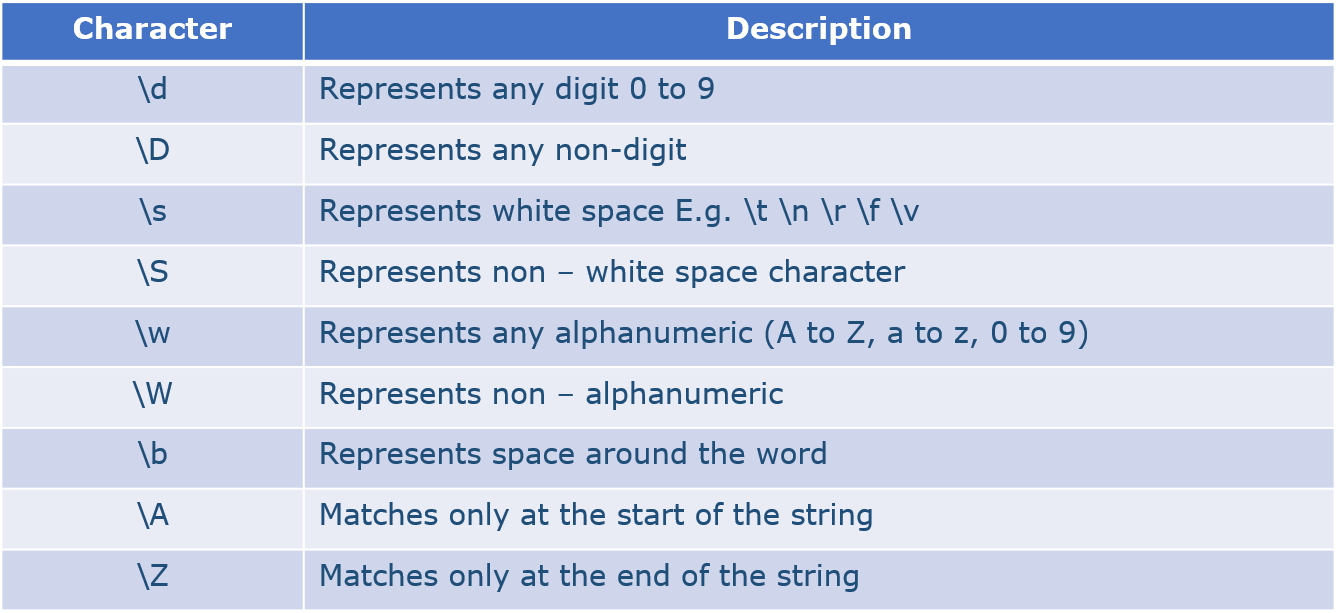

**Note:**

> Each of these sequence characters represents a single character matched in the string

> If we want to repeat sequence characters then Quantifiers will be used


# **Quantifiers in Regular Expression**

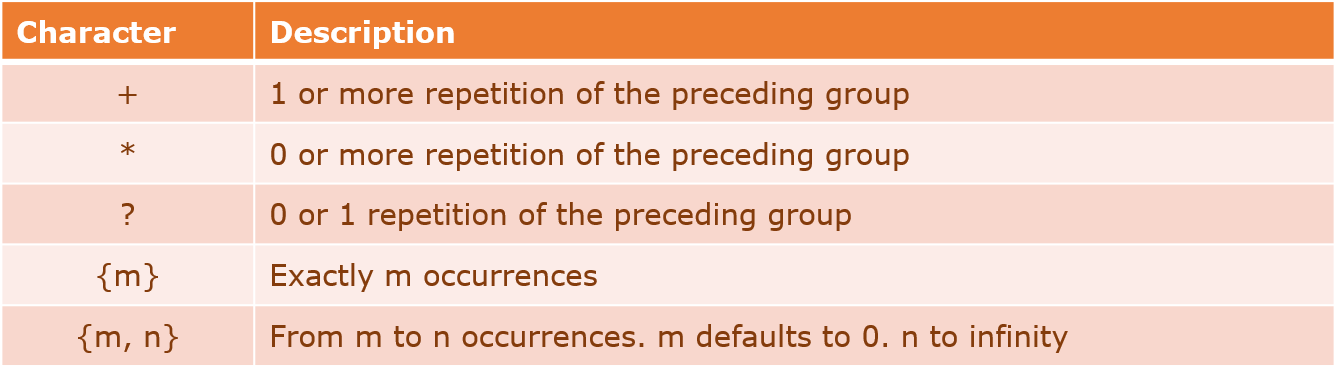

**Example:**

\w indicates any one alphanumeric character

[\w]* represents 0 or more occurrences of alphanumeric characters

[\w]+ represents 1 or more occurrences of alphanumeric characters

[\w]{5} represents alphanumeic character will be repeated 5 times

[\w]{4,} represents strings with minimum lenght 4 and all characters are alphanumeric. Maximum lengh can be anything above 4.

[\w]{4,7} represents strings with minimum lenght 4 and maximum length will be 7. all characters are alphanumeric.

# **Steps to use regular expression**

> 1.  Import module 're'

> 2.  Create a regular expression for required data

> 3.  Compile expression using compile( ) method

> 4.  Perform required operation (match, search, findall, split, sub) on given data using compiled object and store result as object.

> 5.  Apply group( ) method on the result object to get desired output

Compiled object can be used to perform operations on different set of data

---
**Example 1:** To search pattern with length three in which first character is 'm' followed by any two alphanumerals


In [ ]:
import re              # Step 1

st = r"m\w\w"          # Step 2

prog = re.compile(st)  # Step 3

# Step 2 and 3 can be combined as
# prog = re.compile(r"m\w\w")

data = "cat mat bat rat"                       # given data

result = prog.search(data)                     # Step 4

print("search result on data1:", end ="")
print(result.group())                          # Step 5

# prog contains compiled object for given regular expression.
# It can be applied on different set of data as well

data2 = "Operating System format"

print("search result on data2:", end ="")
result2 = prog.search(data2)
print(result2.group())

search result on data1:mat
search result on data2:mat


## **Single Step Compilation of Regular Expression**


The general syntax can be written as:

```
<obj> = re.<method>('expression','string')
```

Here

**obj:** To store the result of operation

**method:** Any suitable method from module 're'

**expression:** Regular Expression to match the pattern

**string:** The data on which the operation will be performed

---

The search operation in Example 1 can be written as

```
result = re.search(r'm\w\w', st)
```

The above code is equivalent to

```
prog = re.compile(r'm\w\w')
result = prog.search(st)
```


# **Operations performed using Regular Expression**

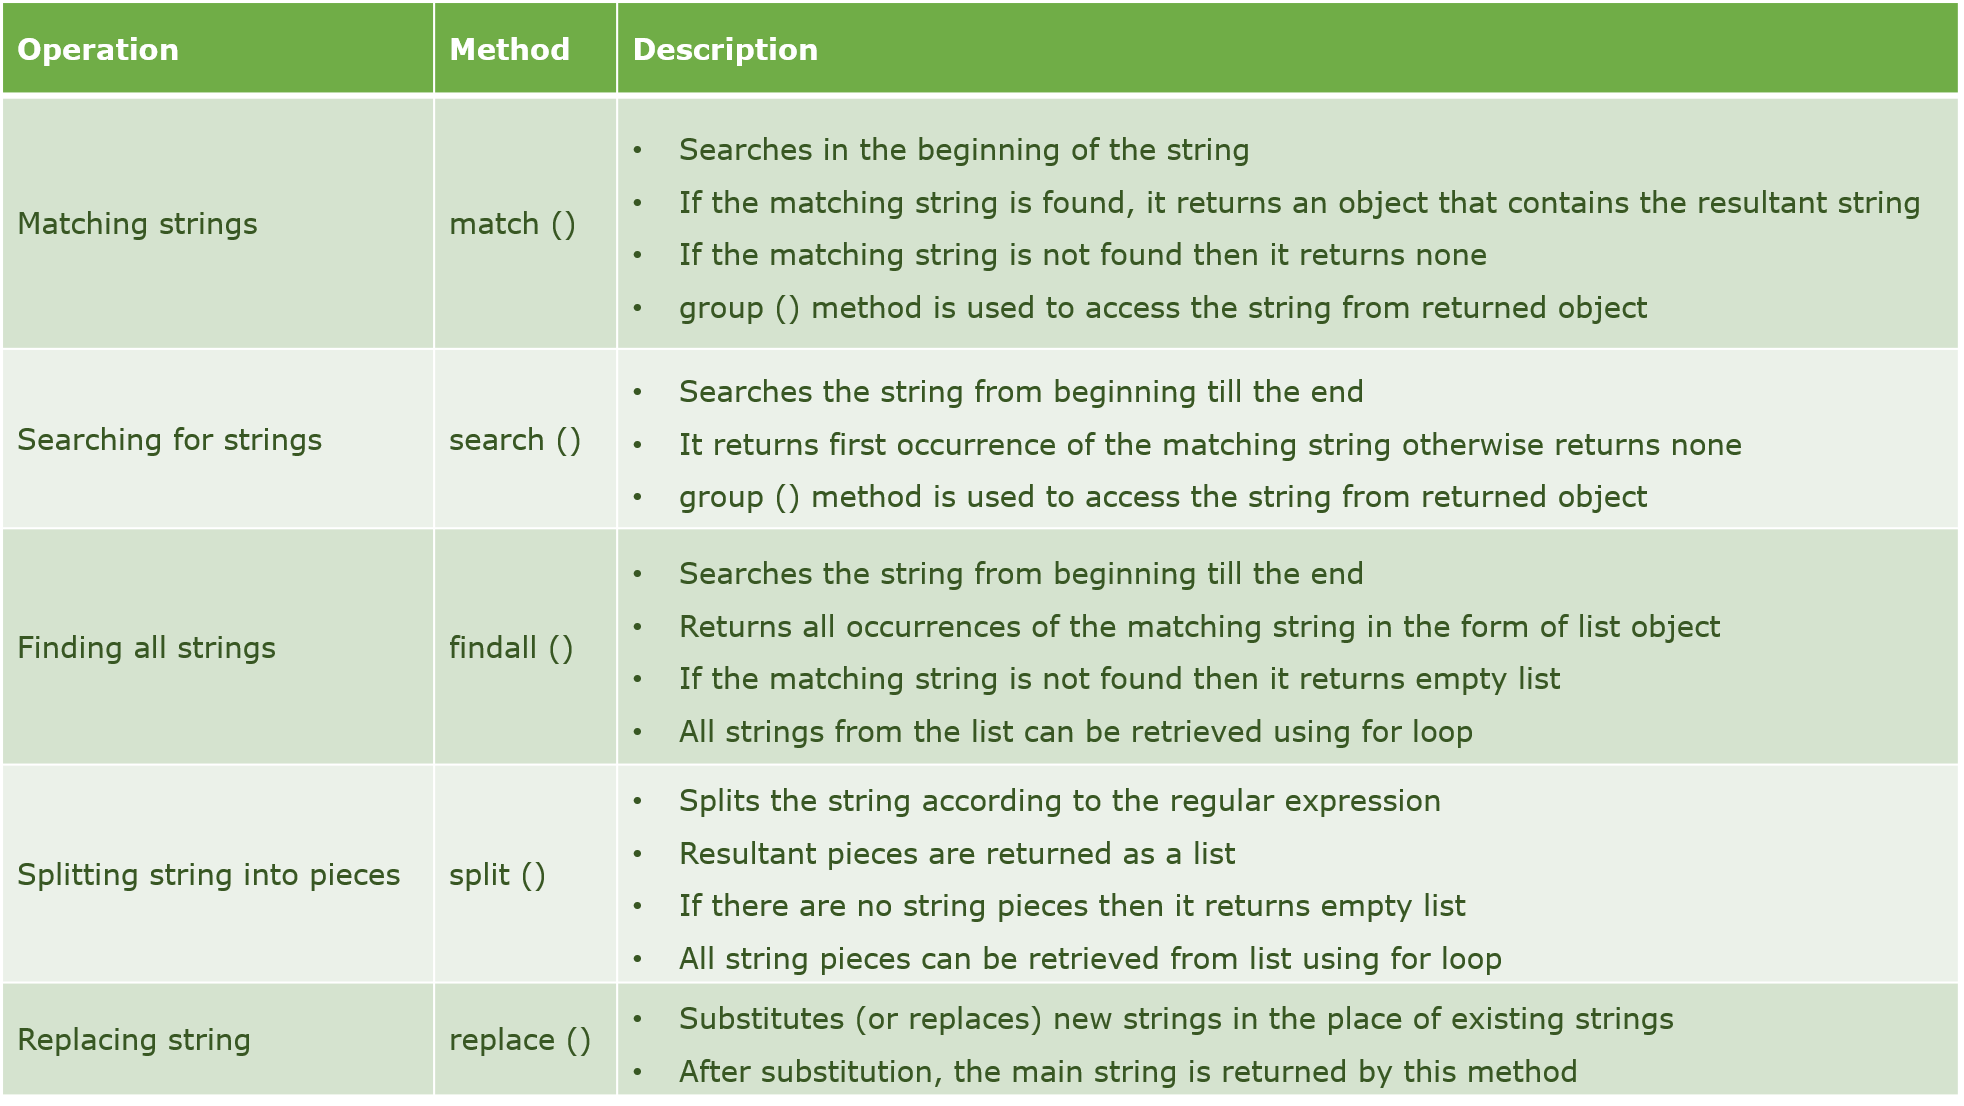


---
**Program 1:** Program to create a regular expression to search for string starting with m and total 3 characters using search( ) method  

In [ ]:
import re

st = 'man sun mop run'
result = re.search('m\w\w',st)     # search method returns only the first occurrence of the pattern

if result:                  # If object is not null
  print(result.group())

man


---
**Program 2:** Program to create a regular expression to search for string starting with m and total 3 characters using findall( ) method

In [ ]:
import re

st = 'man sun mop run'
result = re.findall('m\w\w',st)     # findall method returns all the occurrence of the pattern in form of list

print(result)

['man', 'mop']


---
**Program 3:** Program to create a regular expression to search for string starting with m and total 3 characters using match( ) method

In [ ]:
import re

# Pattern is at the start of data
st = 'man sun mop run'
result = re.match('m\w\w',st)

print(result.group())

# Pattern is present in between
st2 = 'sun man mop run'
result = re.match('m\w\w',st2)

print(result)

man
None


---
**Program 4:** Program to create a regular expression to split a string into pieces where one or more non alpha numeric characters are found

In [ ]:
import re

st = 'This; is the; "Core" Python\'s book'
result = re.split(r'\W+', st)
print(result)

['This', 'is', 'the', 'Core', 'Python', 's', 'book']


---
**Program 5:** Program to create a regular expression to replace a string with a new string

In [ ]:
import re
st = 'Calcutta is the capital of West Bengal'
res = re.sub(r'Calcutta', 'Kolkata', st)
print(res)

Kolkata is the capital of West Bengal


---
**Program 6:** Program to create a regular expression to retrieve all words starting with a in the given string

Regular expression can be:

**r'a[\w]*' -** Here first character is a followed by any number of alphanumerals

But above expression will identify substrings(part of the word) as well.

In order to get entire word then regular expression must be

**r'\ba[\w]*\b** - First \b and last \b tells that before and after the pattern there must be blank space

In [ ]:
import re

st = 'an apple a day keeps the doctor away'
result = re.findall(r'a[\w]*', st)                # Regular Expression that finds all substrings

print('Result for all substrings:')
for word in result:
  print(word)


result2 = re.findall(r'\ba[\w]*\b', st)                # Regular Expression that finds all words

print('Result for all words:')
for word in result2:
  print(word)


Result for all substrings:
an
apple
a
ay
away
Result for all words:
an
apple
a
away


---
**Program 7:** Program to create a regular expression to retrieve all words starting with a numeric digit

Regular expression can be:

**r'\d[\w]* -** The first character is digit followed by any number of alphanumerals

In [ ]:
import re

st = 'The meeting will be conducted on 1st and 21st of every month'
result = re.findall(r'\d[\w]*', st)                # Regular Expression that finds all substrings

print('Result for all substrings:')
for word in result:
  print(word)

Result for all substrings:
1st
21st


---
**Program 8:** Program to create a regular expression to retrieve all words having 5 characters length

Regular expression can be:

**r'\b\w{5}\b -** There are five alphanumerals which are preceded and succeeded by blank spaces

In [ ]:
import re

st = 'One Two Three Four Five Six Seven 8 9 10'
result = re.findall(r'\b\w{5}\b', st)                # Regular Expression that finds all substrings

print('Result:',result)

Result: ['Three', 'Seven']


---
**Program 9:** Program to create a regular expression to retrieve all words having 5 characters length using search ( ) method


In [ ]:
import re

st = 'One Two Three Four Five Six Seven 8 9 10'
result = re.search(r'\b\w{5}\b', st)            # search method returns only the first occurrence of the pattern

# To retrieve the word from result object, use group ()
print(result.group())

Three


---
**Program 9:** Program to create a regular expression to retrieve all words having different range of length

Following regular expressions are used

**r'\b[\w]{4,}\b'** - It finds all the words with minimum length 4

**r'\b[\w]{3,5}\b'** - It finds all the words with minimum length 3 and maximum length 5

In [ ]:
import re

st = 'One Two Three Four Five Six Seven 8 9 10'

result = re.findall(r'\b\w{4,}\b', st)            # words with minimum length 4
print('Words with minimum length four:',result)

result2 = re.findall(r'\b\w{3,5}\b', st)            # words with minimum length 3 and max length 5
print('Words with minimum length three and max lenght five :',result2)

Words with minimum length four: ['Three', 'Four', 'Five', 'Seven']
Words with minimum length three and max lenght five : ['One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven']


---
**Program 10:** Program to create a regular expression to retrieve only single digit from string

In [ ]:
import re

st = 'One Two Three Four Five Six Seven 8 9 10'
result = re.findall(r'\b\d\b', st)

print(result)

['8', '9']


---
**Program 11:** Program to create a regular expression to retrieve the last word of a string starting with T

In [ ]:
import re

st = 'One Two Three'
result = re.findall(r'T[\w]*\Z', st)

print(result)

['Three']


---
**Program 12:** Program to create a regular expression to retrieve the phone number of a person and name of the person separately

Regular Expression can be used as:

**r'[\d]+'**: One or more occurrences of digit

**r'[\D]+**: One or more occurrences of non Digit

In [ ]:
import re

st = 'Abhijit: 9820123122'

res = re.search(r'\d+', st)
print("Phone Number of Person:",res.group())

res1 = re.search(r'\D+', st)
print("Name of Person:",res1.group())

Phone Number of Person: 9820123122
Name of Person: Abhijit: 


---
**Program 13:** Program to create a regular expression to find all the words starting with an or ak.

Regular Expression can be used as:

**r'a[nk][\w]*'** : Here first character is a. Then any character from [nk] can be selected. It is followd by any number of alphanumeric characters

In [ ]:
import re

st = 'anil akhil anant arun arati arundhati abhijit ankur'
result = re.findall(r'a[nk][\w]*', st)

print(result)

['anil', 'akhil', 'anant', 'ankur']


---
**Program 14:** Program to create a regular expression to retrieve date of birth from a string

Regular Expression can be used as:

**r'[\d]{2}-\d{2}-\d{4}' :** Here first two digits are followed by'-'. Then next two digits are followed by '-'. At the last four digits will be checked

In [ ]:
import re

st = 'Vijay: 1-1-2001, Rohit: 22-10-1990, Sita: 15-09-2000  '

result = re.findall(r'[\d]{2}-\d{2}-\d{4}', st)
print("Expression 1:",result)

result2 = re.findall(r'[\d]{1,2}-\d{1,2}-\d{4}', st)
print('Expression 2:',result2)

Expression 1: ['22-10-1990', '15-09-2000']
Expression 2: ['1-1-2001', '22-10-1990', '15-09-2000']


First Date is not retrieved in result as it is not following the format.

All the dates are retrieved for second regular expression


# **Special Characters in Regular Expression**

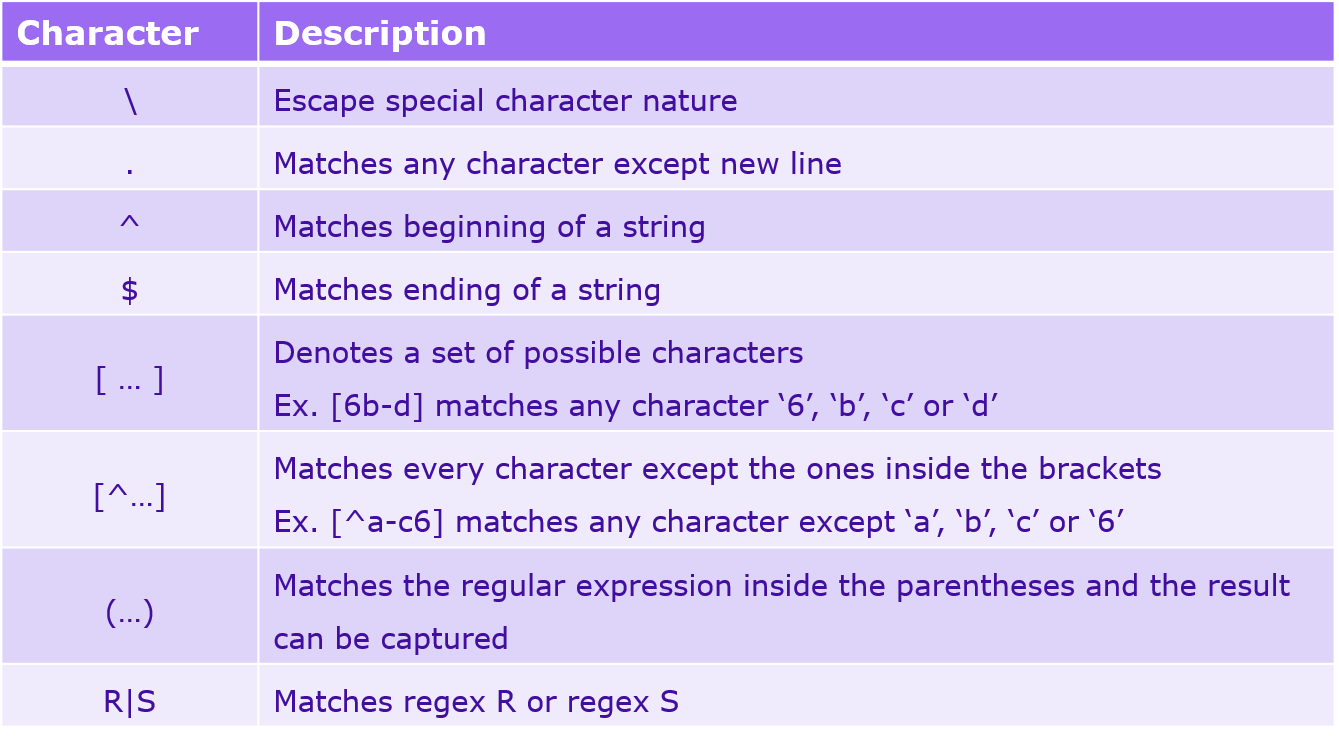

---
**Program 15:** Program to create regular expression to search whether string is starting with 'He' or not

In [ ]:
import re

st = "Hillo World"

res = re.search(r'\AHe',st)
#print(res.group())
if res:
  print("String starts with He")
else:
  print("String does not start with He")

String does not start with He


---
**Program 16:** Program to create regular expression to search whether string is ending with 'World' or not

In [ ]:
import re

st = "Hello World"

res = re.search(r'world$',st)         # Here w is in lowercase

print("Case sensitive output:")
if res:
  print("String ends with 'World'")
else:
  print("String does not end with 'World'")


res2 = re.search(r'world$',st, re.IGNORECASE)         # Here case of letter is ignored

print("Case is ignored output:")
if res2:
  print("String ends with 'World'")
else:
  print("String does not end with 'World'")

Case sensitive output:
String does not end with 'World'
Case is ignored output:
String ends with 'World'


---
**Program 17:** Program to create regular expression to retrieve marks and names from a given string

In [ ]:
# Displaying Marks and Names
import re

st = 'Rahul got 75 marks Vijay got 55 marks, whereas Subhash got 98 marks.'

# Extract marks with 2 digits.
marks = re.findall(r'\d{2}', st)
print(marks)

# Extract names starting with a capital letter
# and remaining alphabetic character
names = re.findall(r'[A-Z][a-z]*', st)
print(names)

['75', '55', '98']
['Rahul', 'Vijay', 'Subhash']


---
**Program 18:** Program to create regular expression to retrieve the timings either 'am' or 'pm'

In [ ]:
import re
st = 'The meeting may be at 8 am or 9 am or 4 pm or 5 pm'

res = re.findall(r'\d\sam|\d\spm',st)
print(res)

['8 am', '9 am', '4 pm', '5 pm']


# **Using Regular Expression on Files**

Regular Expression can be applied on Files. Files consists of multiple strings. The searching, matching operations can be performed on these strings.

There are three steps:

**1.  Open the file to read its content**

```
f = open('<filename>','r')
```

**2. Read line by line from file object f and apply regular expression on it**

```
for line in f:
   res = re.findall(regexpression, line)
```

**3.  Check the size of resultant object. If it is greater than zero then display the content.**

```
if len(res) > 0 :
   print(res)
```
**4.  Close the file**

```
f.close()
```

---
**Program 19:** Program to create regular expression that reads email-ids from text file

The contents of file is shown below

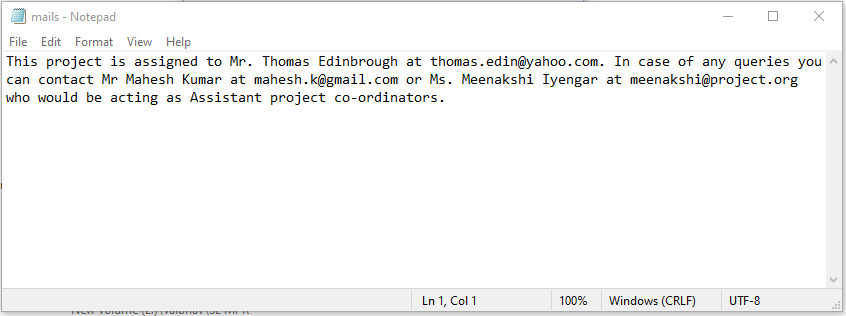

In [ ]:
import re

# Open the file for reading
f = open('mails.txt','r')

# Repeat for each line of the file
for line in f:
  res = re.findall(r'\S+@\S+', line)

# Display if there are some elements in result
if len(res) > 0:
  print(res)

# Close the file
f.close()

['thomas.edin@yahoo.com.', 'mahesh.k@gmail.com', 'meenakshi@project.org']


---
**Program 20:** Program to retrieve data from file using Regular Expression and then write data into file

The content of file is shown as below

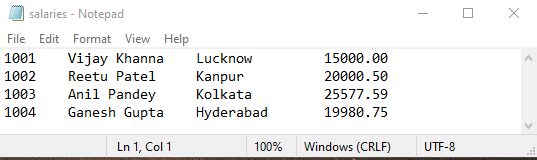

In [ ]:
import re

# Open the files
f1 = open('salaries.txt','r')
f2 = open('newfile.txt','w')

# Repeat for each line in f1
for line in f1:
  res1 = re.search(r'\d{4}',line)           # Extract id from file
  res2 = re.search(r'\d{4,}.\d{2}', line)   # Extract salary from file
  print(res1.group(),res2.group())          # Display the extracted content
  f2.write(res1.group()+"\t")               # Write id into file
  f2.write(res2.group()+"\n")               # Write salary into f2

# Close the file
f1.close()
f2.close()

# To read the content of new file
f = open('newfile.txt','r')

print('\nThe content of new file')
for line in f:
  print(line,end='')

1001 15000.00
1002 20000.50
1003 25577.59
1004 19980.75

The content of new file
1001	15000.00
1002	20000.50
1003	25577.59
1004	19980.75


# **Retrieving Information from HTML File**

We need to open the html file using urlopen() method of urllib.request module in Python

Assume that file is available in F:\py\breakfast.html

Code can be written as

```
import urllib.request
f = urllib.request.urlopen(r'file:///f|py/breakfast.html')
```

Observe raw string.

> The first word 'file:///' indicates file URL scheme that is used to refer to files in the local computer system.

> The next word 'f|py' indicates the driver name 'f' and sub directory 'py'.

> In this folder we have file breakfast.html

We can read the data using read() method as:

```
text = f.read()
```
But the data in the HTML files would be stored in the form of byte strings.

Hence this string is decoded in normal string as

```
st = text.decode()
```

The string st is used to retrieve the required information using regular expression.

```
r'<td>\w+</td>\s<td>(\w+)</td>\s<td>(\d\d.\d\d)</td>'
```

There are three special characters which are embedded in the tags.

So the information which is in between the tags is searched.

> \w+ indicates that we are searching for a word (item numbers).

> The next \w+ is written inside the parentheses. The parentheses tells that the result of the RE inside the parentheses will be obtained. (\w+) stores item names into variables

> (\d\d.\d\d) stores the words item prices in another variable.

If we use findall() method to retrieve the information, it returns the list which contains these two variables as a tuple in every row


In [ ]:
import os
import re
import urllib.request

# Open the html file using urlopen() method
print(os.getcwd())
f = urllib.request.urlopen(r'file:///content/breakfast.html')

# Read data from the file object into text string
text = f.read()

# Convert the byte string into normal string
st = text.decode()

# Apply regular expression on the string
result = re.findall(r'<td>\w+</td>\s<td>(\w+)</td>\s<td>(\d\d.\d\d)</td>', st)

# Display result
print(result)

# Display the items of the result
for items, price in result:
  print('Item:%-15s Price:%-10s'%(id, items,price))

# close the file
f.close()

/content
[('1', 'Roti', '50.05'), ('2', 'Chapati', '55.75'), ('3', 'Dosa', '48.08'), ('4', 'Idly', '25.02'), ('5', 'Vada', '38.90'), ('6', 'Coffee', '20.00'), ('7', 'Tea', '15.00')]
Id:1          Item:Roti            Price:50.05     
Id:2          Item:Chapati         Price:55.75     
Id:3          Item:Dosa            Price:48.08     
Id:4          Item:Idly            Price:25.02     
Id:5          Item:Vada            Price:38.90     
Id:6          Item:Coffee          Price:20.00     
Id:7          Item:Tea             Price:15.00     
